In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('../common')

In [4]:
# Read the dataset
dataset = pd.read_csv('../Data/gradient_sample.csv')
dataset = dataset.drop(['#'], axis = 1)
dataset.head(10)

,x,y
0,7.1,10.8
1,10.4,20.8
2,16.1,6.3
3,20.8,20.3
4,6.6,11.3
5,10.9,20.8
6,15.0,6.8
7,20.2,21.4
8,5.8,11.1
9,10.7,21.3


In [37]:
# Functions to visualize data

def predict_cumulative_output(X, regressors):
    Y = [0] * X.shape[0]
    
    # for each regressor, calculate and add the output
    for regressor in regressors:
        Y = np.add(Y, regressor.predict(X))
        
    # return cumulative output
    return Y

def visualize_iteration(X, Y, Y_next, Y_original, regressors, iteration):
    # if there are regressors as input, plot the cumulative as well as current stage
    if(regressors):
        f, axs = plt.subplots(1,3,figsize=(18,5))
        
        # Get test data for plot
        X_plot = np.arange(X.min() -1, X.max() +1, 0.01).reshape(-1,1)        
        
        # Plot residual data
        plt.subplot(1, 3, 1)
        plt.scatter(X, Y, color='red')
        Y_predict = regressors[-1].predict(X_plot)
        plt.plot(X_plot, Y_predict, color = 'blue')
        plt.title("Iteration " + (str)(iteration) + " - Residual plot")   
        
        # Plot cumulative data
        plt.subplot(1, 3, 2)
        plt.scatter(X, Y_original, color='green')
        Y_predict = predict_cumulative_output(X_plot, regressors)
        plt.plot(X_plot, Y_predict, color = 'blue')
        plt.title("Iteration " + (str)(iteration) + " - Cumulative plot")
        
        # Plot cumulative data
        plt.subplot(1, 3, 3)
        plt.scatter(X, Y_next, color='red')        
        plt.title("Current residuals ")
        
        f.savefig((str)(iteration) + ".png")
    
    # else just plot the scatter plot
    else:
        plt.scatter(X, Y, color = 'green')
        plt.title("Original data")
        plt.xlabel("X")
        plt.ylabel("Y")      
        
    plt.show()

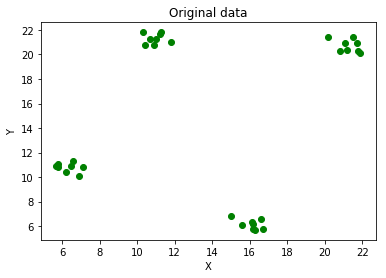

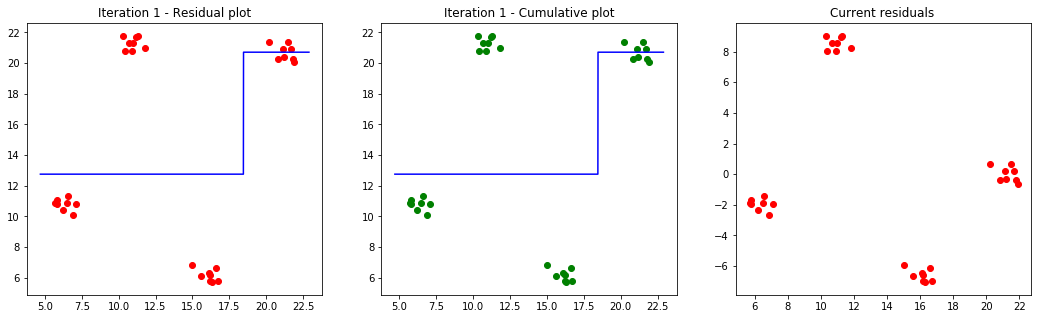

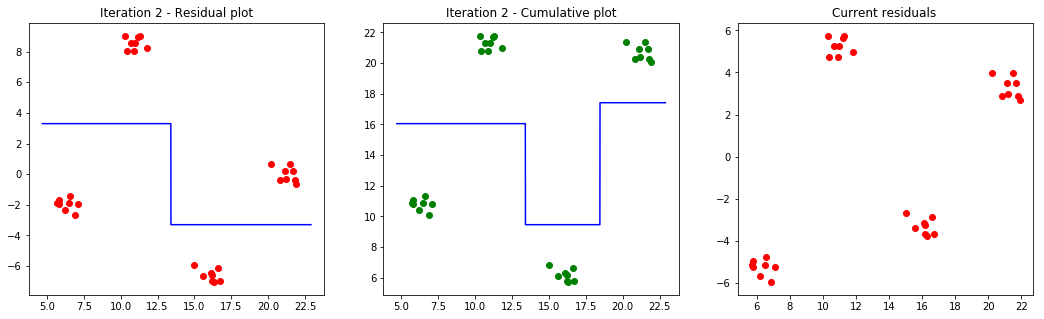

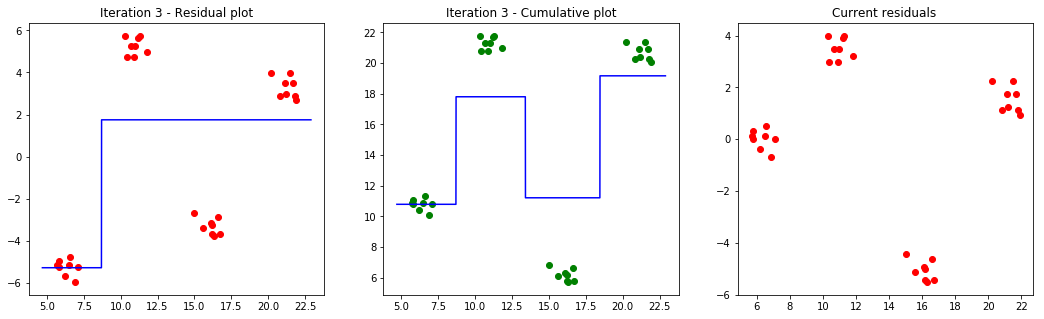

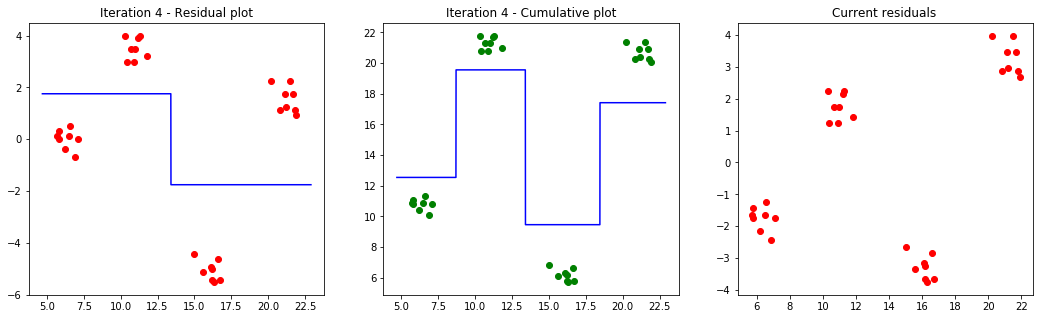

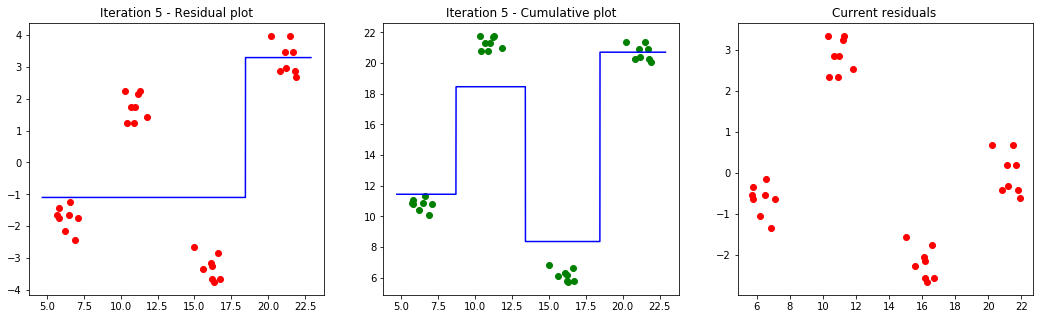

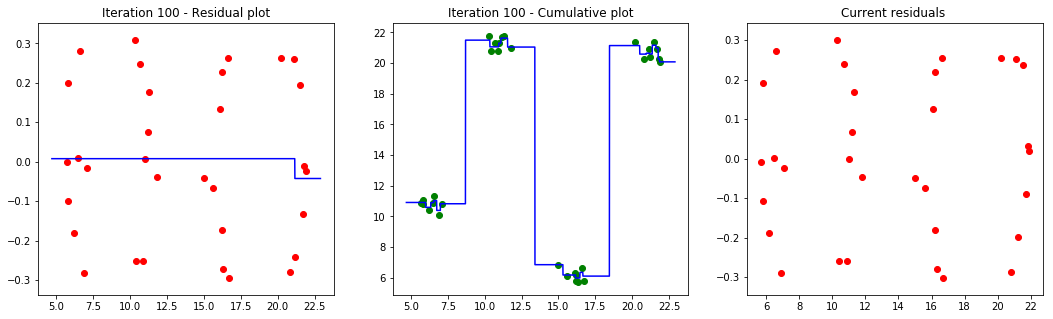

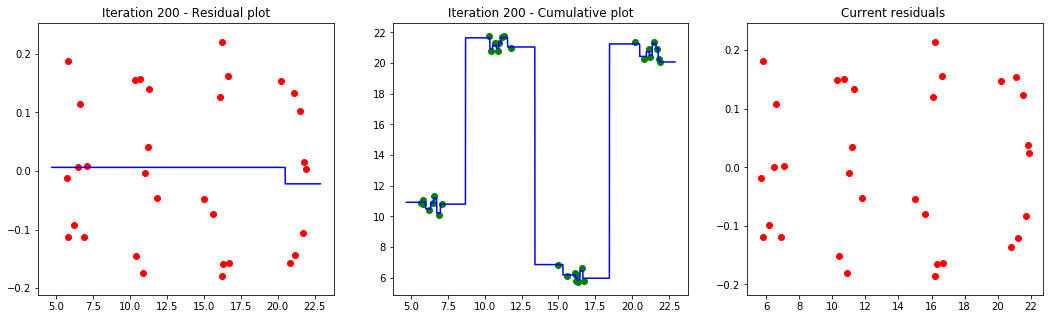

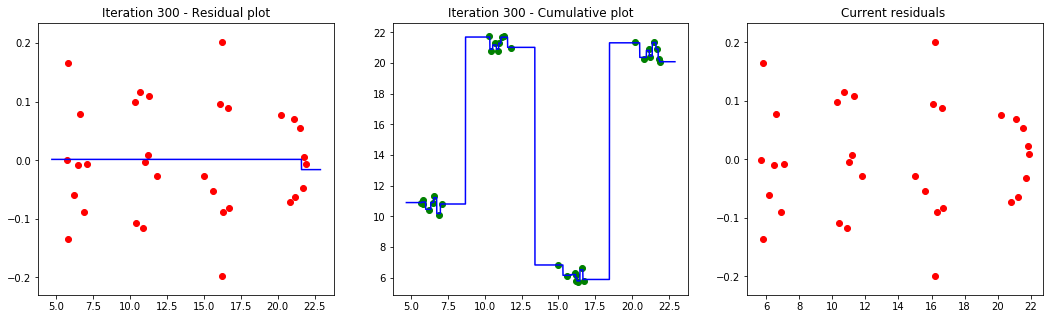

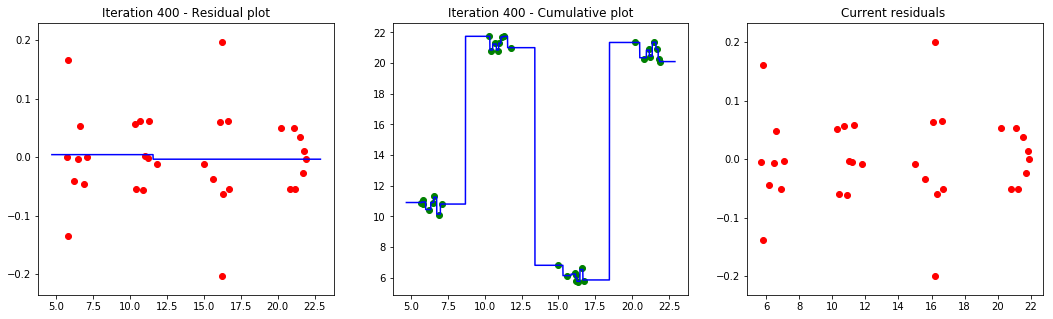

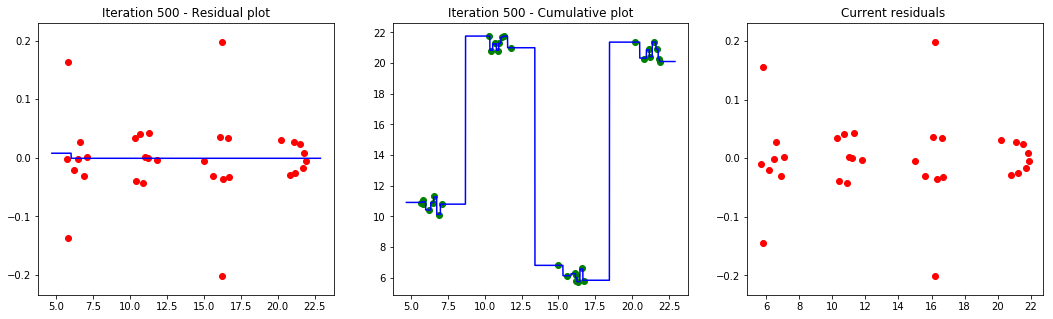

In [39]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
Y_original = Y

visualize_iteration(X, Y, None, None, None, None)

total_iterations = 500
visualization_step = 100
regressors = []

from sklearn.tree import DecisionTreeRegressor

for iteration in range(0, total_iterations):
    # Create a weak regressor
    regressor = DecisionTreeRegressor(max_depth=1)    
    
    # Fit the data to current X and Y and calculate the residuals after cumulative regressors
    regressor.fit(X,Y)
    regressors.append(regressor)    
    Y_predict = predict_cumulative_output(X, regressors)
    Y_new = np.subtract(Y_original, Y_predict)
    
    
    # Visualize key iterations
    if ( (iteration < 5) or (iteration % visualization_step == visualization_step - 1) ):
        visualize_iteration(X, Y, Y_new, Y_original, regressors, iteration + 1)
    
    # Update Y with residuals
    Y = Y_new